<a href="https://colab.research.google.com/github/hwayoung306/AI/blob/main/20220421_py_07_%EC%8B%9C%EA%B3%84%EC%97%B4%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 구글드라이브 연동

In [76]:
# 구글드라이브 연동
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

# 구글 드라이브 파일 확인
!ls '/gdrive/My Drive/temp/'

# 반복되는 드라이브 경로 변수화
drive_path = '/gdrive/My Drive/temp/'

Mounted at /gdrive
 매수종목1.txt			        sample.docx
'2. 영화평점, 날짜별 영화평점 시각화'   sample_merge.pdf
 매수종목2.txt			        sample.xlsx
 auto-mpg.csv			        score.csv
 bmi_500.csv			        seoul.html
 매수종목.csv			       'stock price (1).xlsx'
 data_studentlist_en.csv	       'stock price.xlsx'
'demo (1).docx'			        stock_px.csv
 demo.docx			       'stock valuation.xlsx'
 example.docx			        test.db.db
 height_weight.txt		        test.txt
 hello_world.xlsx		        Titanic배포용
 HelloWorld.xlsx		        titanic_test.csv
'little-char (1).png'		        titanic_train.csv
 little-char.png		        titanic.xls
 population_number.csv		        Traffic_Accident_2017.csv
 ram_price.csv			        train.csv
 ratings_small.txt		        user_id_mean.csv
'sample1 (1).pdf'		        wine.csv
 sample1.pdf			        주가데이터.xlsx
'sample (1).xlsx'		        남북한발전전력량.xlsx
 sample2.pdf


# 시계열 데이터 분석

- 시간상의 여러 지점을 관측하거나 측정할 수 있는 모든 것


시계열 데이터 유형

- 시간내에서 특정 순간의 타임스탬프
- 2020년 4월이나 2020년 전체 같은 고정된 기간
- 시작과 끝 타임스탬프로 표시되는 시간 간격 (기간은 시간 간격의 특수한 경우)
- 경과시간. 특정 시작 시간에 상대적인 시간의 측정값

pandas 는 표준 시계열 도구와 데이터 알고리즘을 제공

- 금융이나 경제관련 또는 서버 로그 데이터 분석에 유용

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame, Series
from numpy.random import randn

# 사용자 편의를 위해 Magic 키워드 를 지원 %, %%
# 주피터 노트북의 대화형 시각화 기능을 활성화
%matplotlib inline
# 그래프를 더 높은 해상도로 출력
%config InlineBackend.figure_format = 'retina'

## 날짜, 시간 자료형

In [3]:
from datetime import datetime

now= datetime.now()
now

now.year, now.month, now.day, now.microsecond

(2022, 4, 22, 654974)

In [ ]:
# 두 datetime 객체 간의 시간적인  차이를 표현
# datetime.timedelta
delta = datetime(2022,4,20) - datetime(2018,6,24,9,10)
delta
delta.days, delta.seconds, delta.microseconds

(1395, 53400, 0)

In [ ]:
from datetime import timedelta

start = datetime(2022, 4, 20)
start - timedelta(7)
start + timedelta(7)

start - ( 2 * timedelta(7) )

datetime.datetime(2022, 4, 6, 0, 0)

In [ ]:
# datetime을 문자열로 변환
stamp = datetime(2022, 4, 20)
a = str(stamp)

# ftime은 포매팅을 통해서 바꾸는 것
# 연도는 %Y는 4자리 연도, %y는 2자리 연도, %M은 분, %m은 달, %s는 초
# %h는 시간

stamp.strftime('%y-%m-%d')

'22-04-20'

In [ ]:
# 문자열을 datetime으로 변환
value = '2022-04-20'
datetime.strptime(value, '%Y-%m-%d')

dates = ['7/6/2022','8/6/2022']
for date in dates :
    [datetime.strptime(date, '%m/%d/%Y')]

# for문으로 리스트 만들기
[datetime.strptime(date, '%m/%d/%Y') for x in dates]


[datetime.datetime(2022, 8, 6, 0, 0), datetime.datetime(2022, 8, 6, 0, 0)]

In [ ]:
# pandas와 함께 자동 설치 됨
# 대부분 사람이 인지하는 날짜 형식을 자동 파싱
from dateutil.parser import parse

parse('2022-04-20')
parse('04-20-2022')
parse('04/20/2022')
parse('2022.04.20')
parse('20220420')
parse('2022-04-20 3:04:20')

datetime.datetime(2022, 4, 20, 3, 4, 20)

In [ ]:
dates = ['7/6/2022', '8/6/2022']
pd.to_datetime(dates) # datetimeindex가 2개 만들어진다

# 누락값(결측치) 처리, NaT(not & time) 누락된 타임스탬츠 데이터
dates + [None] # 리스트 더하기 리스트
df = pd.to_datetime( dates + [None]) # NaT 주입 -> 시간인데 빈데이터
df.isnull() # 2개 같은 내용
pd.isnull(df)

array([False, False,  True])

## 시계열 기초

- TimeSerise

In [4]:
from datetime import datetime

dates = [ 
         datetime(2022, 1, 2), datetime(2022, 1, 5),
         datetime(2022, 1, 7), datetime(2022, 1, 8),
         datetime(2022, 1, 10), datetime(2022, 1, 12),
]

# time이 인덱스인 Serise = ts
ts = pd.Series( np.random.randn(6), index=dates)
ts

2022-01-02   -0.674707
2022-01-05    0.736576
2022-01-07   -0.898822
2022-01-08   -0.199149
2022-01-10    0.489219
2022-01-12   -0.644352
dtype: float64

In [ ]:
ts.index.year

Int64Index([2022, 2022, 2022, 2022, 2022, 2022], dtype='int64')

In [ ]:
display( ts. index)
ts.index.year

DatetimeIndex(['2022-01-02', '2022-01-05', '2022-01-07', '2022-01-08',
               '2022-01-10', '2022-01-12'],
              dtype='datetime64[ns]', freq=None)

Int64Index([2022, 2022, 2022, 2022, 2022, 2022], dtype='int64')

In [ ]:
# 시계열 객체간의 산술 연산
ts[::2]
ts - ts[::2]

2022-01-02    0.0
2022-01-05    NaN
2022-01-07    0.0
2022-01-08    NaN
2022-01-10    0.0
2022-01-12    NaN
dtype: float64

In [ ]:
ts.index.dtype

dtype('<M8[ns]')

In [ ]:
# DatatimeIndex의 스칼라 값은 판다스의 timestamp 객체
# 스칼라 : 한번에 하나의 값만 보유할 수 있는 원자량 (= 변수)
ts.index[0]

Timestamp('2022-01-02 00:00:00')


- 색인과 선택

In [ ]:
# 시계열 라벨에 기반해서 데이터를 선택 index와 값을 가져오는 것
ts.index[2], ts[2]
tindex = ts.index[2]
tindex
ts[tindex]

2.089493021737755

In [ ]:
ts

2022-01-02   -0.820555
2022-01-05    1.313916
2022-01-07    2.089493
2022-01-08   -1.962235
2022-01-10    0.726894
2022-01-12    0.821634
dtype: float64

In [ ]:
# 날짜 문자열을 이용
ts['2022-01-02']
ts['2022/01/02']
ts['20220102']

-0.8205551792563258

* 데이트다임을 인덱스로 한 시리즈 만들기

- freq단위

 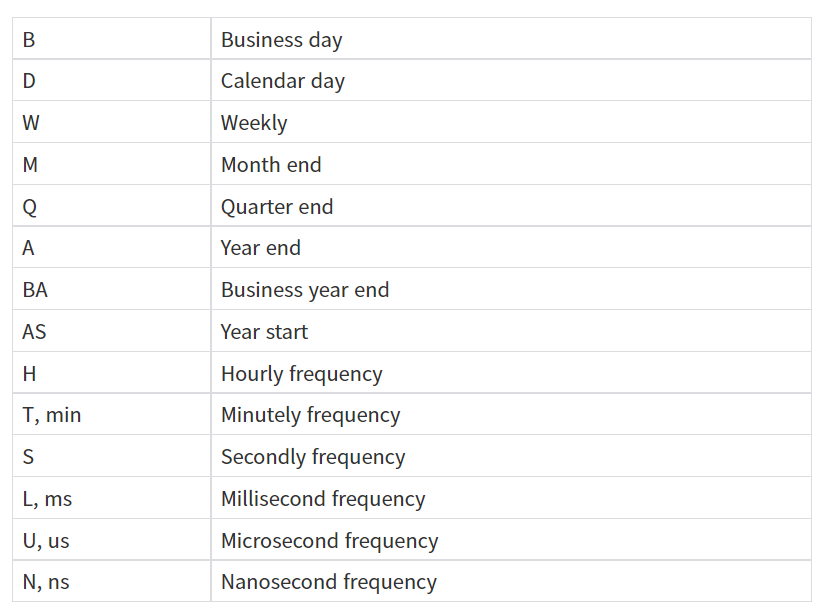

In [ ]:
# 긴 시계열에서 연 또는 월 구간으로 선택
from os import pread

# 자동으로 날짜데이터 만들기 (시작, periods = 갯수, freq = 단위(월,일,주..) / 없으면 일단위 )
rng = pd.date_range('2022/1/1', periods=1000)
rng
print( len(rng) ) # 갯수

# Serise(데이터, 인덱스)
long_ts = pd.Series(np.random.randn( len(rng) ), index = rng)
long_ts

1000


2022-01-01    0.133014
2022-01-02   -0.829949
2022-01-03   -1.179548
2022-01-04    1.145948
2022-01-05   -0.169419
                ...   
2024-09-22    1.154737
2024-09-23    0.157577
2024-09-24    0.296996
2024-09-25    0.055569
2024-09-26    1.218518
Freq: D, Length: 1000, dtype: float64

In [ ]:
long_ts['2022']

2022-01-01   -0.720520
2022-01-02   -0.476812
2022-01-03    1.192609
2022-01-04    0.318489
2022-01-05    0.891122
                ...   
2022-12-27    0.696306
2022-12-28    0.116757
2022-12-29   -0.258360
2022-12-30   -0.688654
2022-12-31    0.399621
Freq: D, Length: 365, dtype: float64

In [ ]:
long_ts['2022-04'].head()

2022-04-01    1.895805
2022-04-02   -0.625007
2022-04-03   -2.253548
2022-04-04    0.620642
2022-04-05    1.479616
Freq: D, dtype: float64

In [ ]:
# 슬라이싱 (범위 선택)
long_ts[ '2024-01-01' : ] # 문자열
long_ts[ datetime(2024, 9, 1) : ] # 숫자 -> 프로그래밍 할 때 좋음
long_ts[ '2022.04.1' : '2022.4.15'].count()

15

In [ ]:
# 데이터 분리 (날짜 나누기) 이 날짜 뒤의 날은 날리기
long_ts.truncate(after='2024.1.1')

2022-01-01    0.133014
2022-01-02   -0.829949
2022-01-03   -1.179548
2022-01-04    1.145948
2022-01-05   -0.169419
                ...   
2023-12-28   -0.076105
2023-12-29   -0.046280
2023-12-30    0.143955
2023-12-31   -0.509784
2024-01-01    1.616787
Freq: D, Length: 731, dtype: float64

* 데이트타임을 인덱스로 한 데이터프레임 만들기

In [ ]:
# DataFrame 적용
rng = pd.date_range('2022.1.1', periods=100, freq='w-WED')
rng

long_df = pd.DataFrame(np.random.randn(100, 4),
                       index = rng,
                       columns = ['서울', '광주', '부산', '대구'])
long_df.head()
long_df.loc['2022-5']

,서울,광주,부산,대구
2022-05-04,-0.251097,-0.091971,1.066981,-1.966896
2022-05-11,-1.162713,-0.239276,-0.504320,-2.020130
2022-05-18,1.537604,1.654641,0.863931,1.599796
2022-05-25,-0.816546,0.122076,0.048014,0.598744


In [ ]:
# 시계열 중복 확인
dates = pd.DatetimeIndex( ['2022.1.1', '2022.1.2','2022.1.2',
                           '2022.1.2', '2022.1.3'])
dup_ts = pd.Series( np.arange( 5 ), index=dates )
dup_ts

2022-01-01    0
2022-01-02    1
2022-01-02    2
2022-01-02    3
2022-01-03    4
dtype: int64

In [ ]:
# 인덱스 중복 여부 확인
# (true -> 유니크 하다 중복 없다. false -> 중복이다! 중복이 있다!!)
dup_ts.index.is_unique

False

In [ ]:
# 중복되지 않을 경우 -> 스칼라 데이터로 가져옴( 값이 1개! )
dup_ts['2022-01-01']

0

In [ ]:
# 중복되는 경우 -> 시리즈 형식으로 가져옴
dup_ts['2022-01-02']

2022-01-02    1
2022-01-02    2
2022-01-02    3
dtype: int64

시계열 데이터 함수 

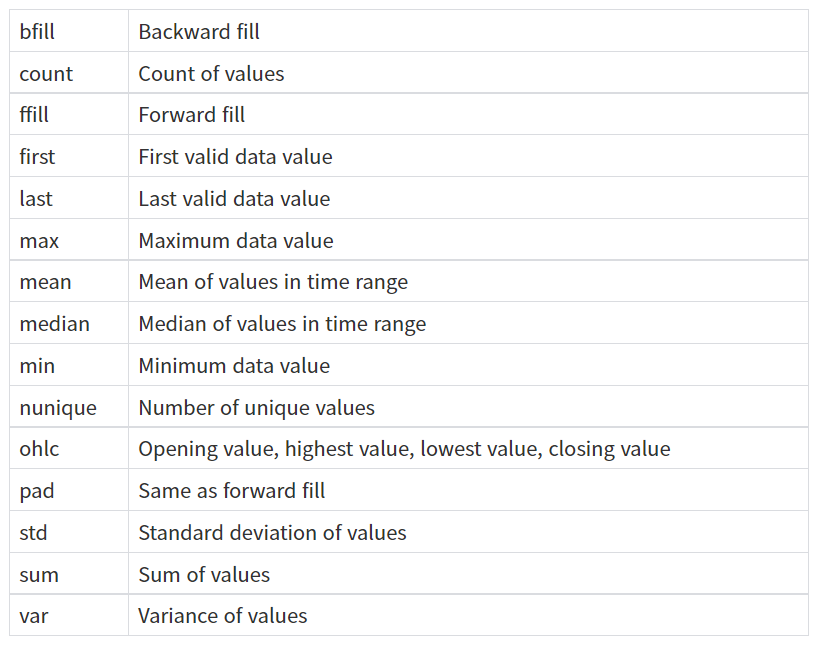

In [ ]:
# 중복 색인 해결
g = dup_ts.groupby(level=0)
display( g.mean() ); print() # 그룹화 한 값의 평균
display( g.count() ) # 그룹화한 값의 갯수 count

2022-01-01    0.0
2022-01-02    2.0
2022-01-03    4.0
dtype: float64

2022-01-01    1
2022-01-02    3
2022-01-03    1
dtype: int64

## 날짜 범위와 빈도

In [ ]:
# 일별 타임스템프 생성
# 앞에서 부터! 뒤에까지! 둘다 포함함
a = pd.date_range('2022-4-1', '2022-6-1')
# 5개만 보기
a[:5]

DatetimeIndex(['2022-04-01', '2022-04-02', '2022-04-03', '2022-04-04',
               '2022-04-05'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
# 기간을 이용한 생성 : 시작일 또는 종료일만 전달
# start를 기준으로 뒤로 생성
pd.date_range(start='2022.4.1', periods=30)

DatetimeIndex(['2022-04-01', '2022-04-02', '2022-04-03', '2022-04-04',
               '2022-04-05', '2022-04-06', '2022-04-07', '2022-04-08',
               '2022-04-09', '2022-04-10', '2022-04-11', '2022-04-12',
               '2022-04-13', '2022-04-14', '2022-04-15', '2022-04-16',
               '2022-04-17', '2022-04-18', '2022-04-19', '2022-04-20',
               '2022-04-21', '2022-04-22', '2022-04-23', '2022-04-24',
               '2022-04-25', '2022-04-26', '2022-04-27', '2022-04-28',
               '2022-04-29', '2022-04-30'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
# end를 기준으로 앞으로 만듦
pd.date_range(end='2022.4.1', periods=30)

DatetimeIndex(['2022-03-03', '2022-03-04', '2022-03-05', '2022-03-06',
               '2022-03-07', '2022-03-08', '2022-03-09', '2022-03-10',
               '2022-03-11', '2022-03-12', '2022-03-13', '2022-03-14',
               '2022-03-15', '2022-03-16', '2022-03-17', '2022-03-18',
               '2022-03-19', '2022-03-20', '2022-03-21', '2022-03-22',
               '2022-03-23', '2022-03-24', '2022-03-25', '2022-03-26',
               '2022-03-27', '2022-03-28', '2022-03-29', '2022-03-30',
               '2022-03-31', '2022-04-01'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
# 빈도값을 이용 / BM은 비즈니스별 월별 영업 마감일
pd.date_range('2022.4.1', '2022.6.1', freq ='BM')

DatetimeIndex(['2022-04-29', '2022-05-31'], dtype='datetime64[ns]', freq='BM')

시계열 빈도 오프셋 별칭

https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries-offset-aliases

In [ ]:
# 시간별 빈도
from pandas.tseries.offsets import Hour, Minute
Hour(), Minute()

four_hour = Hour(4)
pd.date_range('2022-4-1', '2022-4-3 23:59', freq=four_hour)

DatetimeIndex(['2022-04-01 00:00:00', '2022-04-01 04:00:00',
               '2022-04-01 08:00:00', '2022-04-01 12:00:00',
               '2022-04-01 16:00:00', '2022-04-01 20:00:00',
               '2022-04-02 00:00:00', '2022-04-02 04:00:00',
               '2022-04-02 08:00:00', '2022-04-02 12:00:00',
               '2022-04-02 16:00:00', '2022-04-02 20:00:00',
               '2022-04-03 00:00:00', '2022-04-03 04:00:00',
               '2022-04-03 08:00:00', '2022-04-03 12:00:00',
               '2022-04-03 16:00:00', '2022-04-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [ ]:
# 단위를 통일해서 계산함
two_hour_thirty_minutes = Hour(2) + Minute(30)
pd.date_range('2022-04-01', periods = 10,freq = two_hour_thirty_minutes )
# 2시간 30분 간격으로 생성

DatetimeIndex(['2022-04-01 00:00:00', '2022-04-01 02:30:00',
               '2022-04-01 05:00:00', '2022-04-01 07:30:00',
               '2022-04-01 10:00:00', '2022-04-01 12:30:00',
               '2022-04-01 15:00:00', '2022-04-01 17:30:00',
               '2022-04-01 20:00:00', '2022-04-01 22:30:00'],
              dtype='datetime64[ns]', freq='150T')

In [ ]:
# 문자열로 표현하면
pd.date_range('2022-4-1', '2022-4-3 23:59', freq='4h')
pd.date_range('2022-4-1', periods=10, freq='2h30min')

DatetimeIndex(['2022-04-01 00:00:00', '2022-04-01 02:30:00',
               '2022-04-01 05:00:00', '2022-04-01 07:30:00',
               '2022-04-01 10:00:00', '2022-04-01 12:30:00',
               '2022-04-01 15:00:00', '2022-04-01 17:30:00',
               '2022-04-01 20:00:00', '2022-04-01 22:30:00'],
              dtype='datetime64[ns]', freq='150T')

In [ ]:
# 월별 주차 (매월 3째주 금요일)
pd.date_range('2022.1.1', '2022.5.31', freq ='WOM-3FRI').to_list()

[Timestamp('2022-01-21 00:00:00', freq='WOM-3FRI'),
 Timestamp('2022-02-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2022-03-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2022-04-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2022-05-20 00:00:00', freq='WOM-3FRI')]

In [ ]:
# 시작 또는 종료 날짜의 타임 스캠프가 보존됨 (기본)
pd.date_range('2022.4.1 16:11:30', periods=5)

DatetimeIndex(['2022-04-01 16:11:30', '2022-04-02 16:11:30',
               '2022-04-03 16:11:30', '2022-04-04 16:11:30',
               '2022-04-05 16:11:30'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
# 타임스탬프 정규화 : 자정에 맞추기 / 일간 데이터를 사용하고 싶을 때
pd.date_range('2022.4.1 16:11:30', periods=5, normalize=True)

DatetimeIndex(['2022-04-01', '2022-04-02', '2022-04-03', '2022-04-04',
               '2022-04-05'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
# 시간 데이터 이동
# 시계열의 시작이나 끝에 결측치가 발생함
rng = pd.date_range('2022.1.1', periods=4, freq='M')
ts = pd.Series( np.random.randn( len( rng )), index=rng)
display(ts) ; print()
display( ts.shift(2) ); print()
display( ts.shift(-2) ); print()

2022-01-31    0.059156
2022-02-28    1.146432
2022-03-31   -0.805095
2022-04-30    0.001326
Freq: M, dtype: float64

2022-01-31         NaN
2022-02-28         NaN
2022-03-31    0.059156
2022-04-30    1.146432
Freq: M, dtype: float64

2022-01-31   -0.805095
2022-02-28    0.001326
2022-03-31         NaN
2022-04-30         NaN
Freq: M, dtype: float64

In [ ]:
# 빈도를 알고있는 경우 타임스탬프 확장 가능 / 결측치를 없애기 위해서
display( ts.shift(2, freq='M') ) ; print()
display( ts.shift(2, freq='D') ) ; print()
display( ts.shift(3, freq='90T') ) ; print()

2022-03-31    0.059156
2022-04-30    1.146432
2022-05-31   -0.805095
2022-06-30    0.001326
Freq: M, dtype: float64

2022-02-02    0.059156
2022-03-02    1.146432
2022-04-02   -0.805095
2022-05-02    0.001326
dtype: float64

2022-01-31 04:30:00    0.059156
2022-02-28 04:30:00    1.146432
2022-03-31 04:30:00   -0.805095
2022-04-30 04:30:00    0.001326
dtype: float64

In [ ]:
# UTC : 국제표준시
rng = pd.date_range('2022.1.1', periods=5)
ts = pd.Series( np.random.randn( len( rng )), index=rng)

display( ts ); print()
display( ts.tz_localize('UTC')) ; print()

2022-01-01   -0.400488
2022-01-02    0.226526
2022-01-03    1.273233
2022-01-04    0.641751
2022-01-05   -0.992585
Freq: D, dtype: float64

2022-01-01 00:00:00+00:00   -0.400488
2022-01-02 00:00:00+00:00    0.226526
2022-01-03 00:00:00+00:00    1.273233
2022-01-04 00:00:00+00:00    0.641751
2022-01-05 00:00:00+00:00   -0.992585
Freq: D, dtype: float64

## 기간 (Period)

In [ ]:
# 2020년 1월 1일부터 12월 31일 까지 기간을 표현
p = pd.Period(2020, freq ='A-DEC')
p

Period('2020', 'A-DEC')

In [ ]:
# 기간 이동
p+2, p-2

(Period('2022', 'A-DEC'), Period('2018', 'A-DEC'))

In [ ]:
pd.Period(2022, freq='A-DEC') - p

<2 * YearEnds: month=12>

In [ ]:
# 기간 범위
# PeriodIndex : 순차적인 기간을 저장
rng = pd.period_range('2022.1.1', '2022.6.30', freq = 'M')
rng

PeriodIndex(['2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06'], dtype='period[M]')

In [ ]:
ts = pd.Series( np.random.randn( len(rng) ), index = rng)
ts.index # 타입이 PeriodIndex임

PeriodIndex(['2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06'], dtype='period[M]')

In [ ]:
# 분기별로 넣는 것

pd.PeriodIndex( ['2022Q3', '2022Q2', '2022Q1'], freq ='Q-DEC')

PeriodIndex(['2022Q3', '2022Q2', '2022Q1'], dtype='period[Q-DEC]')

In [ ]:
# Period 빈도 변환
# 연단위 데이터
p = pd.Period('2022', freq = 'A-DEC')
display( p )
# 월단위로 변환
display( p.asfreq('M',how ='end') )
display( p.asfreq('M',how ='start') )

Period('2022', 'A-DEC')

Period('2022-12', 'M')

Period('2022-01', 'M')

In [ ]:
# 회계연도 마강이 12월이 아닌 6월인 경우 월간 빈도
p = pd.Period('2022', freq = 'A-JUN')
display( p )
display( p.asfreq('M',how ='end') )
display( p.asfreq('M',how ='start') )

Period('2022', 'A-JUN')

Period('2022-06', 'M')

Period('2021-07', 'M')

In [ ]:
# 시리즈에 적용
# 2020-2022, 회계연도 12월 말
rng = pd.period_range('2020', '2022', freq = 'A-DEC')
ts = pd.Series( np.random.randn( len( rng )), index=rng)
ts
display( ts )   ; print()
display( ts.asfreq('M',how ='end') )     ; print()
display( ts.asfreq('M',how ='start') )  ; print()

2020    0.454446
2021    0.064637
2022   -1.203563
Freq: A-DEC, dtype: float64

2020-12    0.454446
2021-12    0.064637
2022-12   -1.203563
Freq: M, dtype: float64

2020-01    0.454446
2021-01    0.064637
2022-01   -1.203563
Freq: M, dtype: float64

In [ ]:
# '90T' == '90min'

분기(Period) 빈도

- 분기 데이터는 재정, 금융 등의 여러 분야에서 표준으로 사용
- 대체로 회계연도 끝인 12월의 마지막 날이나 마지막 업무일을 기준으로 보고
- pandas 분기 빈도는 Q-JUN 에서 Q-DEC 까지 12가지 모든 경우의 수를 지원

In [ ]:
# 분기 빈도
p = pd.Period('2022Q4', freq = 'Q-JAN')
display( p )

# 분기 빈도 변환
display( p.asfreq('D', how ='start') )
display( p.asfreq('D', how ='end'))

Period('2022Q4', 'Q-JAN')

Period('2021-11-01', 'D')

Period('2022-01-31', 'D')

In [12]:
# 기간 연산
# 분기 영업마감일의 오후 4시를 가리키는  타임스탬프
p = pd.Period('2022Q4', freq = 'Q-JAN')
display( p )
display( p.asfreq('B', 'e'))
# p.asfreq('B', 'e').asfreq('min', 's') + 16 * 60
p4pm = (p.asfreq('B', 'e')-1).asfreq('h', 's') + 16
p4pm.to_timestamp()

Period('2022Q4', 'Q-JAN')

Period('2022-01-31', 'B')

Timestamp('2022-01-28 16:00:00')

In [ ]:
# 분기 범위 연산
rng = pd.period_range('2021Q1', '2022Q2', freq = 'Q-JAN')
ts = pd.Series(np.arange( len(rng)), index = rng)
display(ts) ; print()

# asfreq('B', 'e') : 영업일기준(B)로 마지막날('e'nd) /  asfreq('h', 's') 시간(h)으로 시작시간('s'tart)부터
new_rng = (rng.asfreq('B', 'e')-1).asfreq('h', 's') + 16
ts.index = new_rng.to_timestamp()
display( ts )

2021Q1    0
2021Q2    1
2021Q3    2
2021Q4    3
2022Q1    4
2022Q2    5
Freq: Q-JAN, dtype: int64

2020-04-29 16:00:00    0
2020-07-30 16:00:00    1
2020-10-29 16:00:00    2
2021-01-28 16:00:00    3
2021-04-29 16:00:00    4
2021-07-29 16:00:00    5
dtype: int64

In [ ]:
# 타임 스탬프를 기간으로 변환
rng = pd.date_range('2022-01-01', periods =3, freq = 'M')
ts = pd.Series( np.arange( len(rng) ), index = rng)
display( ts ) ; print()
display(ts.to_period()) # 월단위 기간으로 바뀜

2022-01-31    0
2022-02-28    1
2022-03-31    2
Freq: M, dtype: int64

2022-01    0
2022-02    1
2022-03    2
Freq: M, dtype: int64

In [ ]:
# 빈도에 따라 기간은 중복 될 수 있음
ng = pd.date_range('2022-01-01', periods = 6, freq = 'D')
ts = pd.Series( np.arange( len(rng) ), index = rng)
display( ts ) ; print()
display(ts.to_period('M')) 

2022-01-01    0
2022-01-02    1
2022-01-03    2
2022-01-04    3
2022-01-05    4
2022-01-06    5
Freq: D, dtype: int64

2022-01    0
2022-01    1
2022-01    2
2022-01    3
2022-01    4
2022-01    5
Freq: M, dtype: int64

In [ ]:
# 기간을 타임스탬프로 변환
pts = ts.to_period()
display( pts ); print()
display( pts.to_timestamp(how='end') )

2022-01-01    0
2022-01-02    1
2022-01-03    2
2022-01-04    3
2022-01-05    4
2022-01-06    5
Freq: D, dtype: int64

2022-01-01 23:59:59.999999999    0
2022-01-02 23:59:59.999999999    1
2022-01-03 23:59:59.999999999    2
2022-01-04 23:59:59.999999999    3
2022-01-05 23:59:59.999999999    4
2022-01-06 23:59:59.999999999    5
Freq: D, dtype: int64

## 시계열의 빈도 변환 (리샘플링)

- 다운샘플링: 상위 빈도의 데이터를 하위 빈도로 집계하는 것
- 업샘플링: 다운샘플링 반대 과정
- 그 외 샘플링: 예 W-WED를 W-FRI로 (수요일 기준으로 한 주간을 금요일 기준으로)

In [18]:
rng = pd.date_range('2022.1.1', periods=100, freq = 'D')
ts = pd.Series(np.arange( len(rng) ),
               index=rng) 

display( ts ) ; print()

# resample 바꾸는 것 -> rule은 단위 / 지금 일단위로 만든걸 월단위로 바꾸고 평균을 출력
# resample은 rule과 축이 들어감 그 외 등등
display( ts.resample( 'M' ).mean() ) ; print()

# 뒤의 일 날짜를 없애기 위해 kind를 period를 사용하면 rule 단위로 쪼개짐
display( ts.resample( 'M', kind= 'period' ).mean() ) ; print()

2022-01-01     0
2022-01-02     1
2022-01-03     2
2022-01-04     3
2022-01-05     4
              ..
2022-04-06    95
2022-04-07    96
2022-04-08    97
2022-04-09    98
2022-04-10    99
Freq: D, Length: 100, dtype: int64

2022-01-31    15.0
2022-02-28    44.5
2022-03-31    74.0
2022-04-30    94.5
Freq: M, dtype: float64

2022-01    15.0
2022-02    44.5
2022-03    74.0
2022-04    94.5
Freq: M, dtype: float64

pandas.Series.resample
- https://pandas.pydata.org/docs/reference/api/pandas.Series.resample.html?highlight=resample#pandas.Series.resample

In [35]:
# 분단위 데이터 사례
# 2022년 1월 1일 기준으로 12개의 분단위 데이터
rng = pd.date_range('2022.1.1', periods=12, freq = 'T')
ts = pd.Series(np.arange( len(rng) ),
               index=rng)
display( ts ) ; print()

# 5분 단위로 증가하는 그룹의 경계를 정의
# 각 그룹의 왼쪽 타임스템프가 라벨로 지정(기본)
display( ts.resample( '5T' ).sum() ) ; print()
display( ts.resample( '5min' ).sum() )  ; print()

2022-01-01 00:00:00     0
2022-01-01 00:01:00     1
2022-01-01 00:02:00     2
2022-01-01 00:03:00     3
2022-01-01 00:04:00     4
2022-01-01 00:05:00     5
2022-01-01 00:06:00     6
2022-01-01 00:07:00     7
2022-01-01 00:08:00     8
2022-01-01 00:09:00     9
2022-01-01 00:10:00    10
2022-01-01 00:11:00    11
Freq: T, dtype: int64

2022-01-01 00:00:00    10
2022-01-01 00:05:00    35
2022-01-01 00:10:00    21
Freq: 5T, dtype: int64

2022-01-01 00:00:00    10
2022-01-01 00:05:00    35
2022-01-01 00:10:00    21
Freq: 5T, dtype: int64

In [33]:
# 기준을 오른쪽으로 변경
display( ts.resample( '5T', closed ='right').sum() ) ; print()

2021-12-31 23:55:00     0
2022-01-01 00:00:00    15
2022-01-01 00:05:00    40
2022-01-01 00:10:00    11
Freq: 5T, dtype: int64

In [32]:
# 라벨을 오른쪽으로
display( ts.resample( '5T', closed ='right', label='right').sum() ) ; print()

2022-01-01 00:00:00     0
2022-01-01 00:05:00    15
2022-01-01 00:10:00    40
2022-01-01 00:15:00    11
Freq: 5T, dtype: int64

In [31]:
# 1초를 빼서
display( ts.resample( '5T', closed ='right', label='right', offset='-1s').sum() ) ; print()

2022-01-01 00:04:59    10
2022-01-01 00:09:59    35
2022-01-01 00:14:59    21
Freq: 5T, dtype: int64

In [36]:
# 금융분야 시계열 데이터 집계
# OHLC :  Open high low Colse
ts.resample('5T').ohlc()

,open,high,low,close
2022-01-01 00:00:00,0,4,0,4
2022-01-01 00:05:00,5,9,5,9
2022-01-01 00:10:00,10,11,10,11


In [56]:
# 주간 데이터를 담고 있는 DataFrame
# 2022년 1월 1일 매주 수요일 기준의 데이터 2건
columns =['서울', '광주', '부산', '대구']
rng = pd.date_range('2022.1.1', periods=2, freq = 'W')
df = pd.DataFrame(np.random.randn(2, 4),
                       index = rng,
                       columns = columns)
df

,서울,광주,부산,대구
2022-01-02,1.365185,-0.208440,0.248074,-0.320616
2022-01-09,-0.603433,0.268714,-0.611881,0.700749


In [57]:
# 결측치 발생
df.resample('D').asfreq()

,서울,광주,부산,대구
2022-01-02,1.365185,-0.208440,0.248074,-0.320616
2022-01-03,NaN,NaN,NaN,NaN
2022-01-04,NaN,NaN,NaN,NaN
2022-01-05,NaN,NaN,NaN,NaN
2022-01-06,NaN,NaN,NaN,NaN
2022-01-07,NaN,NaN,NaN,NaN
2022-01-08,NaN,NaN,NaN,NaN
2022-01-09,-0.603433,0.268714,-0.611881,0.700749


In [58]:
# 이전 값을 채워서 보간을 수행
df.resample('D').ffill()

,서울,광주,부산,대구
2022-01-02,1.365185,-0.208440,0.248074,-0.320616
2022-01-03,1.365185,-0.208440,0.248074,-0.320616
2022-01-04,1.365185,-0.208440,0.248074,-0.320616
2022-01-05,1.365185,-0.208440,0.248074,-0.320616
2022-01-06,1.365185,-0.208440,0.248074,-0.320616
2022-01-07,1.365185,-0.208440,0.248074,-0.320616
2022-01-08,1.365185,-0.208440,0.248074,-0.320616
2022-01-09,-0.603433,0.268714,-0.611881,0.700749


In [59]:
# 보간법 적용 범위
df.resample('D').ffill(limit=3)

,서울,광주,부산,대구
2022-01-02,1.365185,-0.208440,0.248074,-0.320616
2022-01-03,1.365185,-0.208440,0.248074,-0.320616
2022-01-04,1.365185,-0.208440,0.248074,-0.320616
2022-01-05,1.365185,-0.208440,0.248074,-0.320616
2022-01-06,NaN,NaN,NaN,NaN
2022-01-07,NaN,NaN,NaN,NaN
2022-01-08,NaN,NaN,NaN,NaN
2022-01-09,-0.603433,0.268714,-0.611881,0.700749


In [60]:
# 새로운 날짜 색인은 이전 색인만 변동
# 결측치 발생 안함
df.resample('W-FRI').ffill()

,서울,광주,부산,대구
2022-01-07,1.365185,-0.208440,0.248074,-0.320616
2022-01-14,-0.603433,0.268714,-0.611881,0.700749


In [64]:
# Period로 색인된 데이터
# 2021년 1월부터 2022년 12월 까지 월단위 기간
columns =['서울', '광주', '부산', '대구']
rng = pd.period_range('2021-01', '2022-12', freq = 'M')
df = pd.DataFrame(np.random.randn( len( rng ), len(columns)),
                       index = rng,
                       columns = columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 24 entries, 2021-01 to 2022-12
Freq: M
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   서울      24 non-null     float64
 1   광주      24 non-null     float64
 2   부산      24 non-null     float64
 3   대구      24 non-null     float64
dtypes: float64(4)
memory usage: 960.0 bytes


In [65]:
df.resample('Q-DEC').mean()

,서울,광주,부산,대구
2021Q1,-1.659528,1.193721,-0.067646,0.083331
2021Q2,-0.613759,-0.737576,-0.226899,-0.784089
2021Q3,-0.318971,-0.120730,-0.460530,-0.518934
2021Q4,0.379793,0.522146,-0.060121,0.573369
2022Q1,0.310714,0.424534,0.732376,-0.032030
2022Q2,-0.007874,0.702836,0.150767,0.119614
2022Q3,-0.378947,-1.590003,-0.267437,-0.027868
2022Q4,-0.065414,0.247193,0.680016,0.644489


In [66]:
annual_df = df.resample('A-DEC').mean()
annual_df

,서울,광주,부산,대구
2021,-0.553117,0.21439,-0.203799,-0.161581
2022,-0.035380,-0.05386,0.323930,0.176051


In [67]:
annual_df.resample('Q-DEC').ffill()

,서울,광주,부산,대구
2021Q1,-0.553117,0.21439,-0.203799,-0.161581
2021Q2,-0.553117,0.21439,-0.203799,-0.161581
2021Q3,-0.553117,0.21439,-0.203799,-0.161581
2021Q4,-0.553117,0.21439,-0.203799,-0.161581
2022Q1,-0.035380,-0.05386,0.323930,0.176051
2022Q2,-0.035380,-0.05386,0.323930,0.176051
2022Q3,-0.035380,-0.05386,0.323930,0.176051
2022Q4,-0.035380,-0.05386,0.323930,0.176051


기간에 대한 업샘플링과 다운샘플링 조건

- 다운샘플링의 경우 대상 빈도는 반드시 원본 빈도의 하위 기간이어야 한다
- 업샘플링의 경우 대상 빈도는 반드시 원본 빈도의 상위 기간이어야 한다

## 이동창 함수 (moving window function)

## 이동창 함수 (moving window function)

- 누락된 데이터로 인해 매끄럽지 않은 시계열 데이터를 매끄럽게 다듬는 방법
- 시계열 데이터는 다른 형태의 데이터와는 다른 종류의 분석과 데이터 변형을 요구

In [81]:
df = pd.read_csv(drive_path + 'stock_px.csv', index_col=0, parse_dates=True)
df.index

DatetimeIndex(['2003-01-02', '2003-01-03', '2003-01-06', '2003-01-07',
               '2003-01-08', '2003-01-09', '2003-01-10', '2003-01-13',
               '2003-01-14', '2003-01-15',
               ...
               '2011-10-03', '2011-10-04', '2011-10-05', '2011-10-06',
               '2011-10-07', '2011-10-10', '2011-10-11', '2011-10-12',
               '2011-10-13', '2011-10-14'],
              dtype='datetime64[ns]', length=2214, freq=None)

In [82]:
# 애플, 마이크로소프트, 엑슨모빌(석유회사), S&P 500 지수 (500대 대형기업)
df.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2214 entries, 2003-01-02 to 2011-10-14
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2214 non-null   float64
 1   MSFT    2214 non-null   float64
 2   XOM     2214 non-null   float64
 3   SPX     2214 non-null   float64
dtypes: float64(4)
memory usage: 86.5 KB


In [85]:
df[ ['AAPL','MSFT','XOM'] ]
df.loc[:, 'AAPL':'XOM']
df.iloc[:, :-1]

df = df.iloc[:, :-1]
df.head(3)

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96


In [86]:
rdf = df.resample('B').ffill()
rdf[:12]

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
2003-01-09,7.34,21.93,29.44
2003-01-10,7.36,21.97,29.03
2003-01-13,7.32,22.16,28.91
2003-01-14,7.30,22.39,29.17
2003-01-15,7.22,22.11,28.77


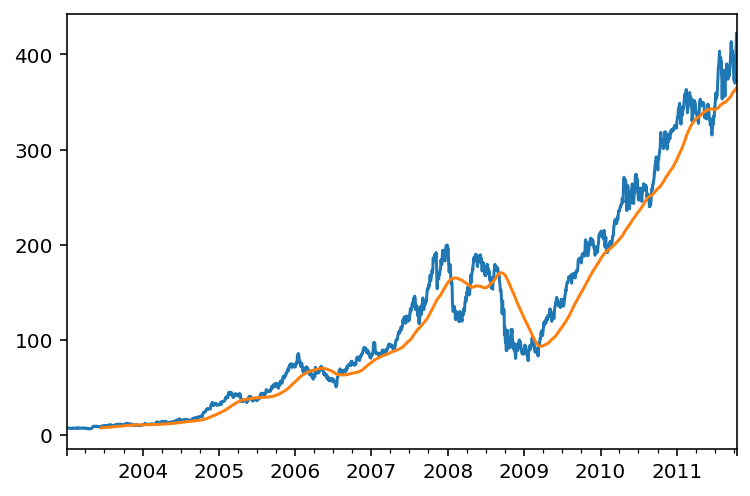

In [90]:
# 애플 주가의 250일 이동평균
rdf['AAPL'].plot()
rdf['AAPL'].rolling(120).mean().plot()

2003-01-02         NaN
2003-01-03         NaN
2003-01-06         NaN
2003-01-07         NaN
2003-01-08         NaN
2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

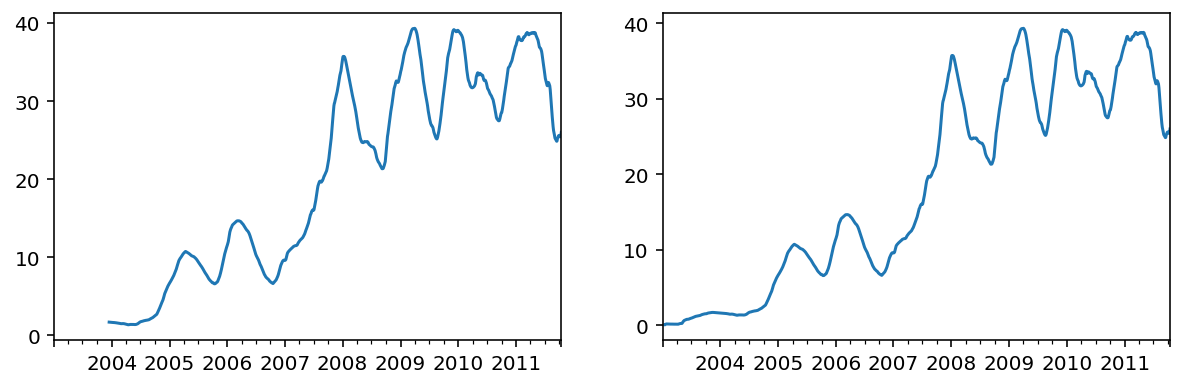

In [99]:
# 애플의 250일 일별 수익 표준편차
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

rdf['AAPL'].rolling(250).std().plot(ax=axes[0])

aapl_std250 = rdf['AAPL'].rolling(250, min_periods=10).std()
aapl_std250.plot(ax=axes[1])

aapl_std250[:12]

[DataFrame.expanding](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.expanding.html?highlight=expanding#pandas.DataFrame.expanding)

- 확장창 평균: <br>시계열의 시작 지점에서부터 창의 크기가 <br>시계열의 전체 크기가 될 때까지 점점 창의 크기를 늘린다

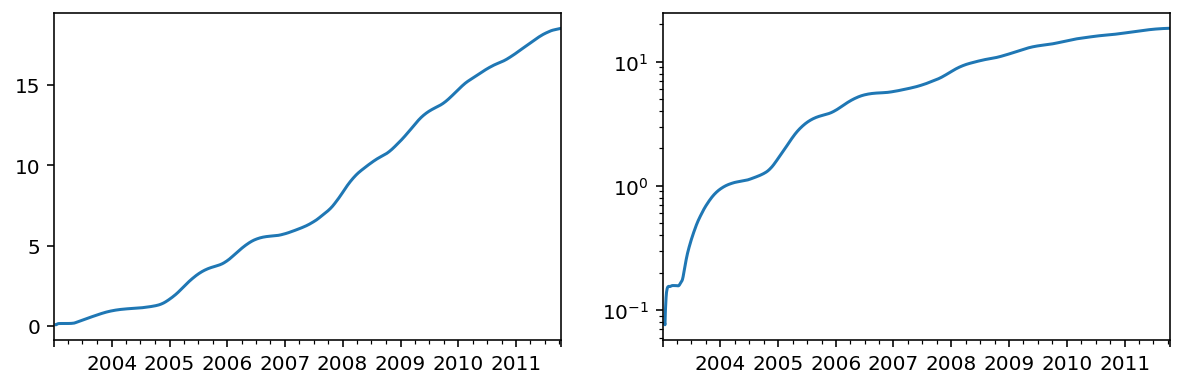

In [104]:
# 확장창 평균 (Y축 로그스케일)
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

aapl_std250.expanding().mean().plot(ax=axes[0])
aapl_std250.expanding().mean().plot(ax=axes[1], logy=True)

In [ ]:
rdf

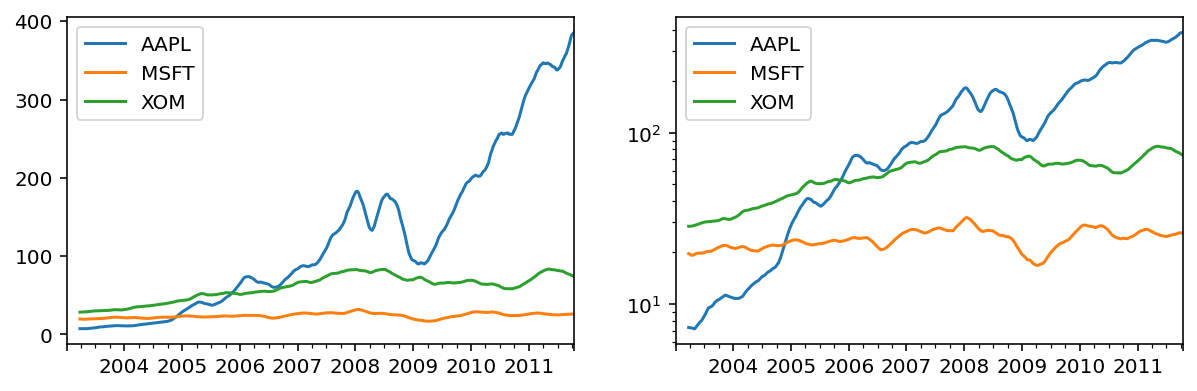

In [110]:
# 주가의 60일 이동평균 Y축 로그스케일
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

rdf.rolling(60).mean().plot(ax=axes[0])
rdf.rolling(60).mean().plot(ax=axes[1], logy=True)

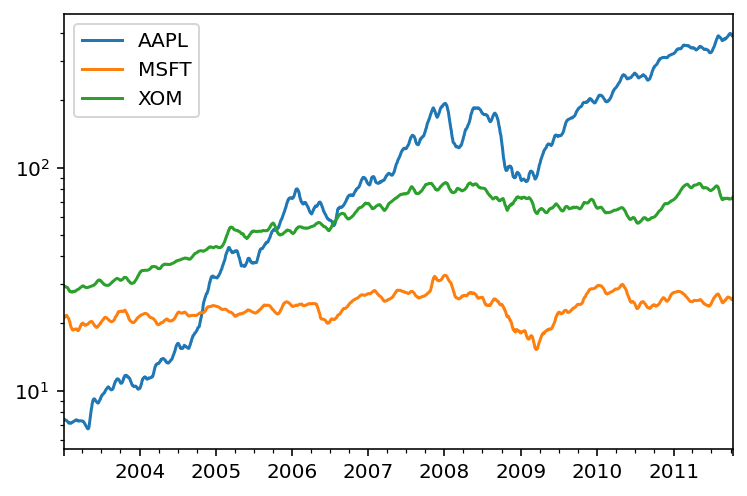

In [112]:
# rolling 함수에 고정 크기의 기간 지정 문자열을 사용

# 위의 그래프보다 앞에 빈 공간이 없어짐
# 20일 크기 이동평균
rdf.rolling('20D').mean()
rdf.rolling('20D').mean().plot(logy=True)

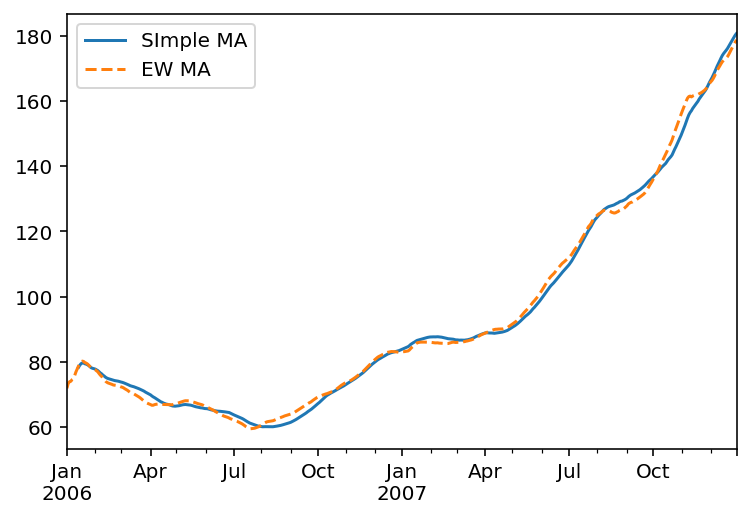

In [119]:
# 애플주가 60일 이동평균
# 단순 이동평균과 지수가중(EW) 이동평균을 비교
aapl_df = rdf['AAPL']["2006":'2007']
aapl_df

ma60 = aapl_df.rolling(60, min_periods=10).mean()
ewma60 = aapl_df.ewm(span=60).mean()

ma60.plot(label='SImple MA')
ewma60.plot(label ='EW MA', ls='--')
plt.legend()

비교 : 이동창 함수
  * 상관관계외 공분산 -> 두 개의 시계열을 필요

In [120]:
# S&P 500 지수와 비교
df = pd.read_csv(drive_path + 'stock_px.csv', index_col=0, parse_dates=True)
spx_df = df['SPX']
spx_df

2003-01-02     909.03
2003-01-03     908.59
2003-01-06     929.01
2003-01-07     922.93
2003-01-08     909.93
               ...   
2011-10-10    1194.89
2011-10-11    1195.54
2011-10-12    1207.25
2011-10-13    1203.66
2011-10-14    1224.58
Name: SPX, Length: 2214, dtype: float64

[Series.pct_change](https://pandas.pydata.org/docs/reference/api/pandas.Series.pct_change.html?highlight=pct_change#pandas.Series.pct_change)

- 현재 요소와 이전 요소 간의 백분율 변경
- 기본적으로 바로 이전 행의 백분율 변경을 계산
- 요소의 시계열에서 변화의 백분율을 비교할 때 유용

In [123]:
# 비교 대상들을 모두 백분율로 변환 (0과 1사이)
spx_rets = spx_df.pct_change()
rdf_rets = rdf.pct_change()

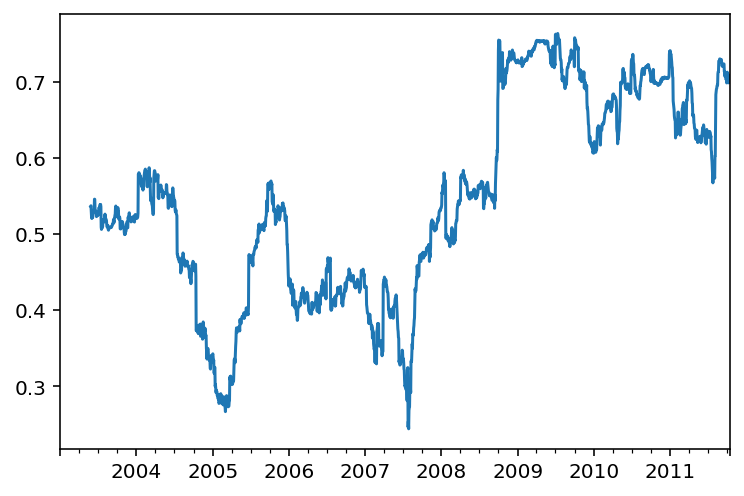

In [127]:
# 6개월 간의 S&P 500지수와 AAPL 수익 상관관계
rdf_rets['AAPL'].rolling(180, min_periods=100).corr(spx_rets).plot()

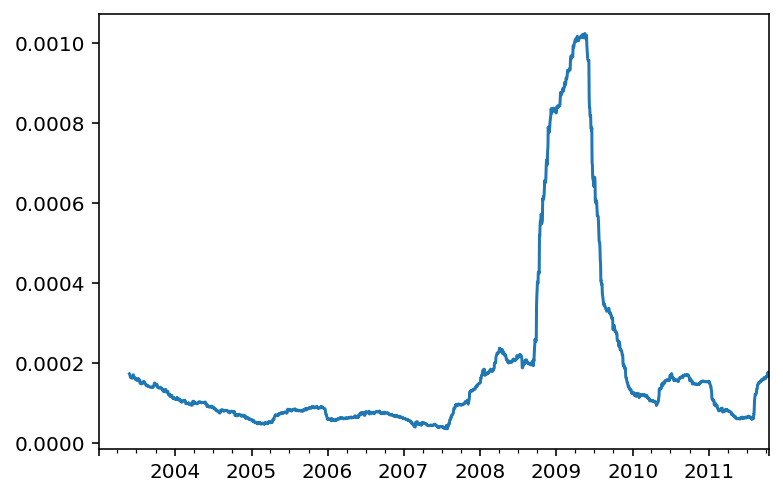

In [128]:
rdf_rets['AAPL'].rolling(180, min_periods=100).cov(spx_rets).plot()

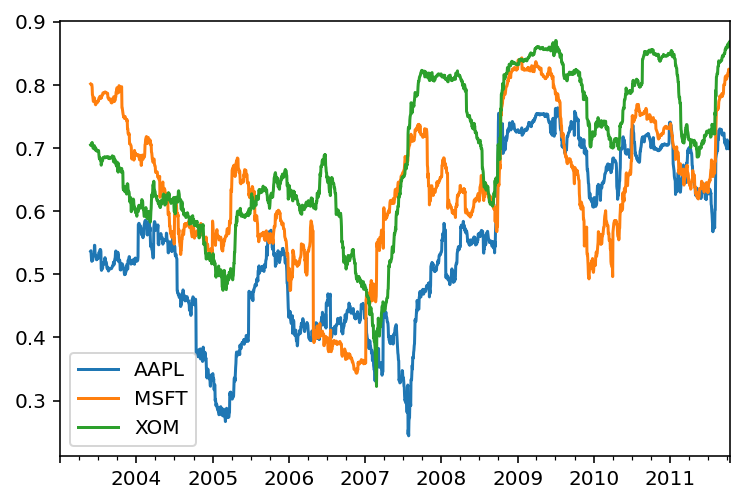

In [131]:
# 여러 주식과 S&P500 지수와의 상관관계를 한번에 계산
rdf_rets.rolling(180, min_periods=100).corr(spx_rets).plot()

http://data.krx.co.kr
- 한국 거래소가 운영하는 정보데이터시스템
- 기업분석, 시장동향 등의 다양한 통계 정보를 제공